# 🌍 Mappa delle Cadute di Meteoriti (Puntini Rossi e Visibili)
Mostra solo i meteoriti effettivamente **caduti** (`Fell`).

- Slider dal 1900 al 2020
- Puntini **rossi**, ben visibili anche da lontano
- **Dimensione proporzionale alla massa** del meteorite
- Se non ci sono meteoriti caduti in quell'anno, la mappa è vuota


In [4]:

import pandas as pd
import plotly.express as px
from ipywidgets import interact, IntSlider
import warnings
warnings.filterwarnings('ignore')

# Caricamento
df = pd.read_csv("meteorite_landings.csv")
df = df.dropna(subset=['year', 'reclat', 'reclong', 'fall', 'mass (g)'])
df['year'] = df['year'].astype(int)
df = df[df['year'] >= 1900]

# Funzione di plotting
def plot_meteorites(year):
    all_found = df[df['year'] == year]
    only_fell = all_found[all_found['fall'] == 'Fell']

    print(f"🔎 Anno {year}:")
    print(f"- Meteoriti trovati totali: {len(all_found)}")
    
    if only_fell.empty:
        print("\n😐 Nessun meteorite caduto. Mappa vuota per riferimento.\n")
        fig = px.scatter_geo(
            lat=[],
            lon=[],
            projection='natural earth',
            title=f"Meteoriti caduti nel {year} (0 risultati)"
        )
    else:
        fig = px.scatter_geo(
            only_fell,
            lat='reclat',
            lon='reclong',
            hover_name='name',
            size='mass (g)',
            size_max=20,
            color_discrete_sequence=['red'],
            projection='natural earth',
            title=f"Meteoriti caduti nel {year}",
            opacity=0.8
        )

    fig.update_layout(
        geo=dict(
            showland=True,
            landcolor='rgb(243, 243, 243)',
            showcountries=True
        ),
        margin={"r":0,"t":40,"l":0,"b":0}
    )
    fig.show()

# Slider interattivo
interact(
    plot_meteorites,
    year=IntSlider(
        min=1900,
        max=2013,
        step=1,
        value=1900,
        continuous_update=False
    )
)


interactive(children=(IntSlider(value=1900, continuous_update=False, description='year', max=2013, min=1900), …

<function __main__.plot_meteorites(year)>

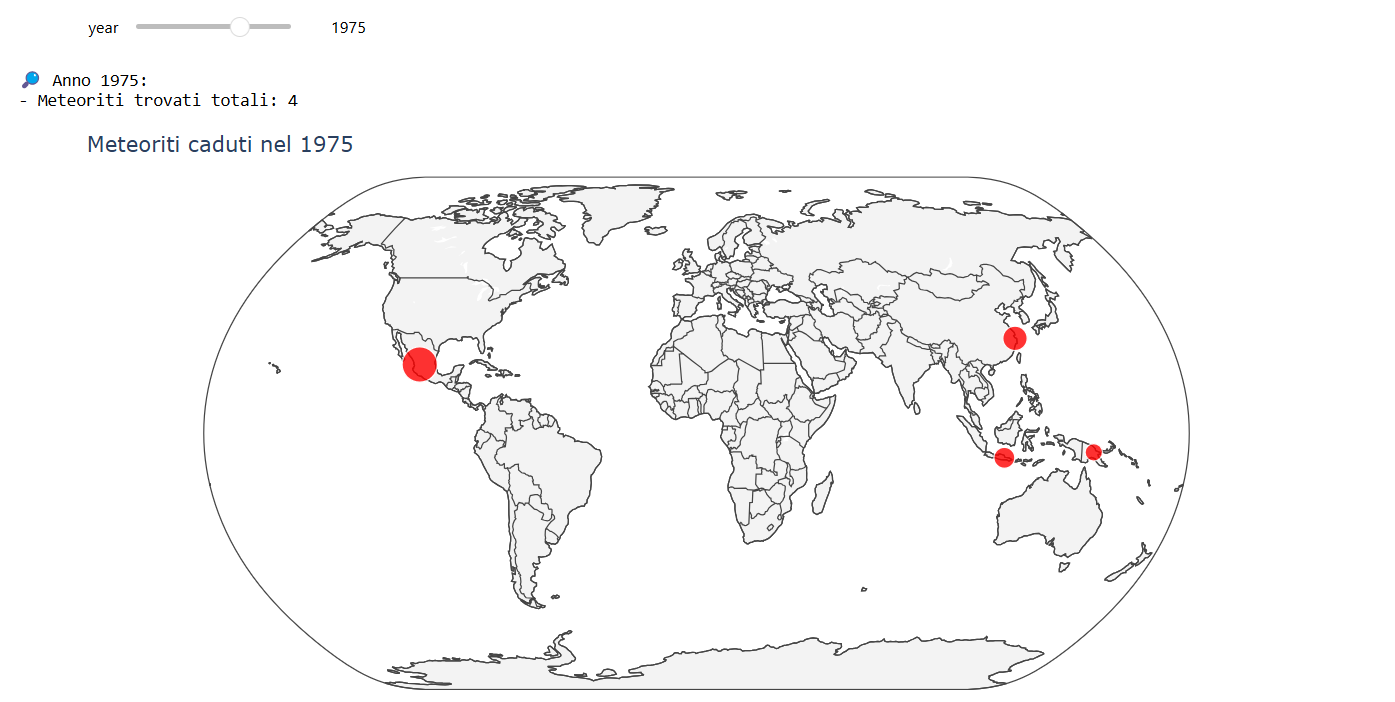

### 🌍 Mappa Animata dei Meteoriti Caduti dal 1900 al 2013

Questa mappa mostra, anno dopo anno, i meteoriti **effettivamente caduti** sulla superficie terrestre a partire dal 1900.  
I dati sono tratti dal dataset `meteorite_landings.csv`, filtrati per eventi confermati ("Fell") e visualizzati tramite **Plotly**.

- La **dimensione** di ogni punto rappresenta (in scala logaritmica) la **massa** del meteorite.
- L'animazione evidenzia l'**accumulo temporale** degli eventi meteorici.
- Il colore rosso identifica ogni meteorite nella mappa proiettata secondo una vista realistica (Natural Earth).

In [5]:
import pandas as pd
import plotly.express as px

# Caricamento e pulizia dati
df = pd.read_csv("meteorite_landings.csv")
df = df.dropna(subset=['year', 'reclat', 'reclong', 'fall', 'mass (g)'])
df['year'] = df['year'].astype(int)
df = df[df['year'] >= 1900]
df = df[df['fall'] == 'Fell']

# Crea la colonna per animazione cumulativa
all_frames = []
for year in range(1900, 2014):
    temp = df[df['year'] <= year].copy()
    temp['cumulative_to'] = year
    all_frames.append(temp)

df_cumulative = pd.concat(all_frames)

# Massa scalata in modo bilanciato
df_cumulative['mass_scaled'] = df_cumulative['mass (g)']**0.25  # un po’ meno della versione prima

# Mappa animata
fig = px.scatter_geo(
    df_cumulative,
    lat='reclat',
    lon='reclong',
    hover_name='name',
    size='mass_scaled',
    size_max=25,  # molto più sobrio
    color_discrete_sequence=['red'],
    projection='natural earth',
    animation_frame='cumulative_to',
    title='Meteoriti caduti nel mondo (dal 1900 in avanti)',
    opacity=0.8
)

fig.update_layout(
    geo=dict(
        showland=True,
        landcolor='rgb(243, 243, 243)',
        showcountries=True
    ),
    margin={"r":0,"t":40,"l":0,"b":0}
)

fig.show()


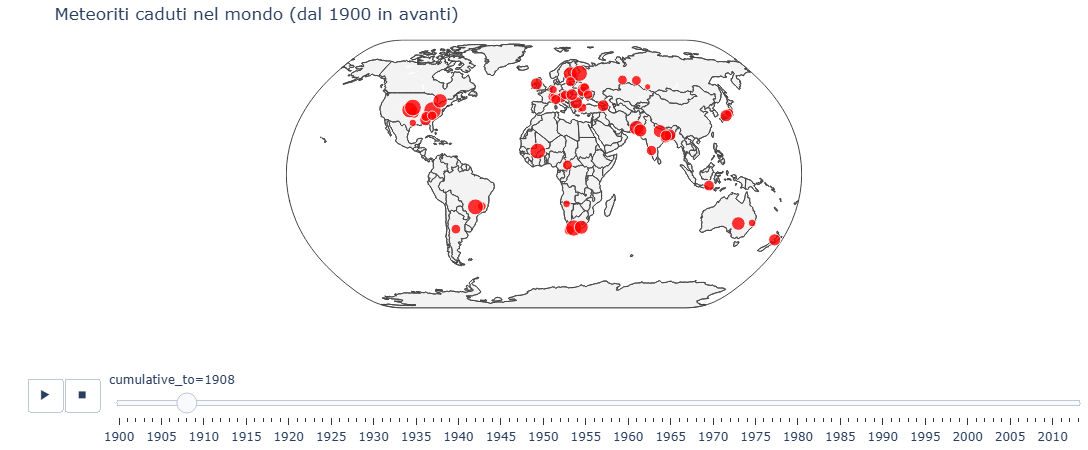

### 🔥 Heatmap Interattiva dei Meteoriti Caduti (intervalli di 25 anni)

Questa visualizzazione mostra una **mappa di densità (heatmap)** dei meteoriti **effettivamente caduti** sulla Terra in intervalli mobili di **25 anni**, dal 1900 al 2013.

- Utilizza `ipywidgets` per permettere all’utente di selezionare l’intervallo desiderato tramite uno **slider interattivo**.
- Ogni heatmap è costruita con `Plotly` e rappresenta visivamente le aree con maggiore concentrazione di impatti.
- Il colore (da giallo a rosso) rappresenta la **densità locale di impatti**.
- Il filtro `"Fell"` assicura che siano considerati solo eventi realmente osservati.

⚠️ Gli anni finali sono limitati a 2013 in base alla qualità e disponibilità dei dati.


In [6]:
import pandas as pd
import plotly.express as px
from ipywidgets import interact, IntSlider

# Caricamento e pulizia dati
df = pd.read_csv("meteorite_landings.csv")
df = df.dropna(subset=['year', 'reclat', 'reclong', 'fall'])
df['year'] = df['year'].astype(int)
df = df[df['fall'] == 'Fell']
df = df[(df['year'] >= 1900) & (df['year'] <= 2013)]

# Funzione per mostrare heatmap di un intervallo di 25 anni
def plot_heatmap(start_year):
    end_year = start_year + 25
    filtered = df[(df['year'] >= start_year) & (df['year'] < end_year)]

    if filtered.empty:
        print(f"Nessun meteorite caduto tra {start_year} e {end_year}.")
        return

    fig = px.density_mapbox(
        filtered,
        lat='reclat',
        lon='reclong',
        radius=15,
        center=dict(lat=0, lon=0),
        zoom=0.5,
        mapbox_style="carto-positron",
        color_continuous_scale="YlOrRd",
        title=f"🌍 Heatmap Meteoriti Caduti ({start_year} - {end_year - 1})"
    )

    fig.update_layout(
        margin=dict(l=0, r=0, t=50, b=0),
        font=dict(family='Arial', size=14, color='black'),
        title=dict(font=dict(size=20, color='black')),
        coloraxis_colorbar=dict(
            title=dict(text="Densità", font=dict(size=14, color='black')),
            tickfont=dict(color='black')
        )
    )

    fig.show()

# Slider per scegliere l'inizio dell'intervallo
interact(
    plot_heatmap,
    start_year=IntSlider(
        min=1900,
        max=1988,  # 2013 - 25
        step=1,
        value=1900,
        description='Anno Inizio:',
        continuous_update=False
    )
)


interactive(children=(IntSlider(value=1900, continuous_update=False, description='Anno Inizio:', max=1988, min…

<function __main__.plot_heatmap(start_year)>

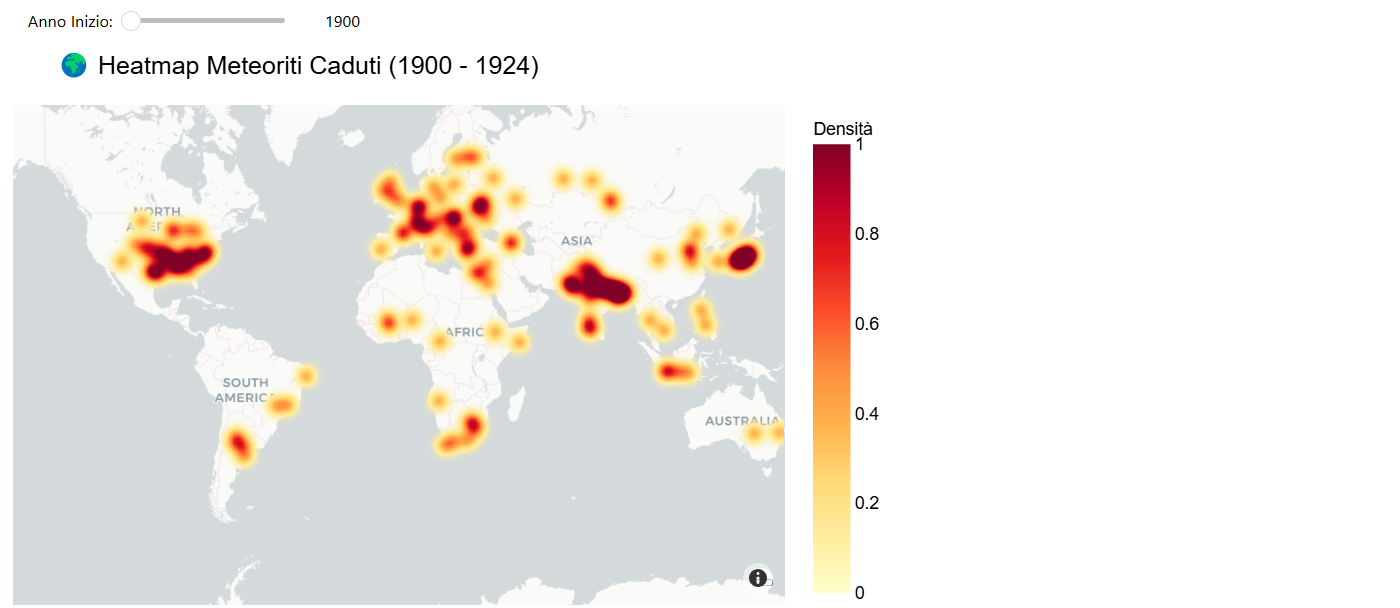